#### Linear Regression - Project 4

# We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import datetime
import time

In [ ]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [ ]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value by the name MEDV is missing from the dataframe. It is present in dataset.target.
Let's add that to the df.

In [ ]:
df['MEDV'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Are there any null values in the dataset?

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

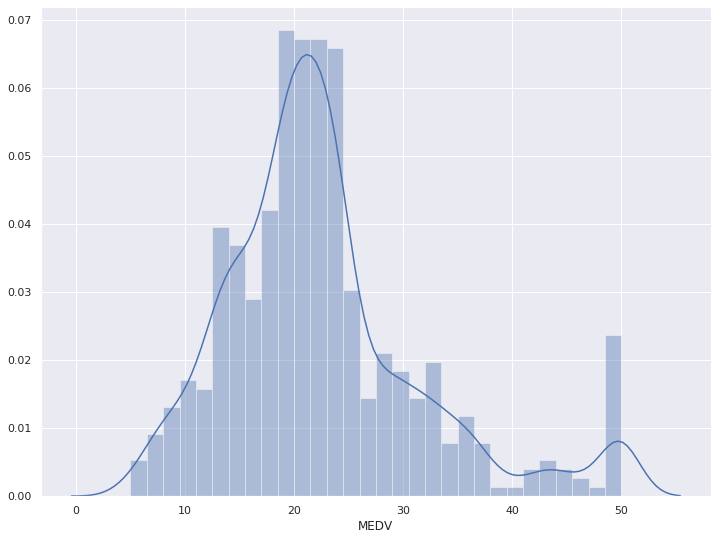

In [ ]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Assignment

We'll work with the above dataset for the assignment below. Create a blank notebook for the assignment.

### Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1] - ***ANS*** According to the plotted graph, 0 is the best lambda where the minima occurs

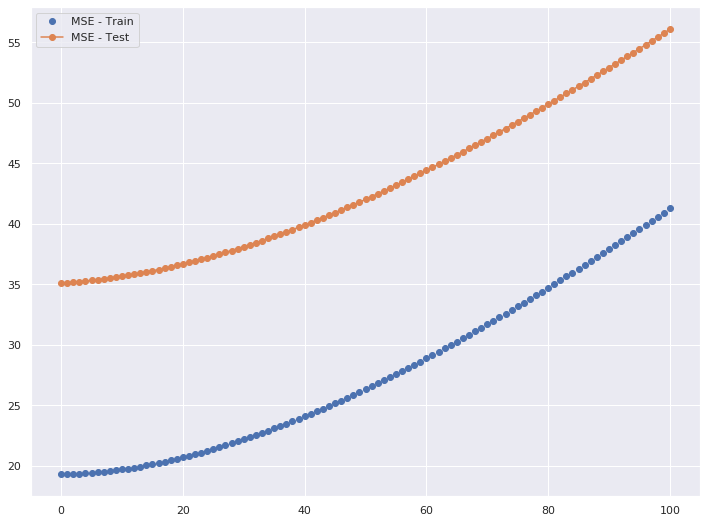

(101,)

In [ ]:
#splitting the data
X=df.drop('MEDV', axis=1)
y=df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) #random state = 0, so that splitting takes place in specific order, not random element wise

#scaling the data
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

#to add 1 in the first column
X_train_std_1 = np.hstack((np.ones(np.size(X_train_std,0)).reshape(-1,1), X_train_std))
X_test_std_1 = np.hstack((np.ones(np.size(X_test_std,0)).reshape(-1,1), X_test_std))

# Calculating analytical solution for training data

mse_train = []
mse_test = []
f=14
for lamb in range(0,101):
  w = np.dot(np.linalg.inv(np.dot(X_train_std_1.T, X_train_std_1) + (lamb)*np.identity(f)), np.dot(X_train_std_1.T, y_train))
  yPred_train = np.dot(X_train_std_1, w)
  yPred_test = np.dot(X_test_std_1, w)
  mse_train.append(mean_squared_error(yPred_train, y_train))
  mse_test.append(mean_squared_error(yPred_test, y_test))

mse_train = np.asarray(mse_train)
mse_test = np.asarray(mse_test)
lamb_ar = np.arange(0,101)

plt.plot(lamb_ar, mse_train, 'o', label='MSE - Train')
plt.plot(lamb_ar, mse_test, 'o-', label='MSE - Test')

plt.legend()
plt.show()

mse_test.shape

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]

![alt text](https://drive.google.com/uc?id=0B6YksgEu_VxDQnptVnZQamlMUFdZcElTUTZMZkctTHN3ZHdn)

### Question 3

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]

In [ ]:
#gradient descent method
y_train = np.asarray(y_train).reshape(-1,1)

def gradient_descent(X,y,lamda=0,learningrt=0.01,itera=1000):
  mse_graddesc = []
  #w_rand = np.random.randn(np.size(X,1),1)
  #w_rand = np.zeros([np.size(X,1),1])
  
  np.random.seed(0)
  w_rand = np.random.randn(14, 1)
  
  for i in range(0,itera):
    ypredgrad = np.dot(X_train_std_1,w_rand)
    w_rand = w_rand - learningrt*(1/len(y_train))*(np.dot(X_train_std_1.T, (ypredgrad-y_train))+(lamda*w_rand))
    mse_graddesc.append(mean_squared_error(ypredgrad, y))
  return w_rand, mse_graddesc

w_graddesc, mseq3 = gradient_descent(X_train_std_1, y_train, lamda=0, learningrt=0.01, itera=9000)
print(w_graddesc)


[[22.61188119]
 [-0.97048296]
 [ 1.05657043]
 [ 0.03639592]
 [ 0.59476772]
 [-1.85464096]
 [ 2.57355203]
 [-0.0878927 ]
 [-2.88093828]
 [ 2.10772708]
 [-1.87023845]
 [-2.29257045]
 [ 0.71808624]
 [-3.59230437]]


In [ ]:
# analytical solution with lambda = 0
f = 14
lamb=0
w = np.dot(np.linalg.inv(np.dot(X_train_std_1.T, X_train_std_1) + (lamb)*np.identity(f)), np.dot(X_train_std_1.T, y_train))

#comparison of analytical theeta with gradient descent theeta

for i in range(np.size(X_train_std_1,1)):
  perc = ((w[i,0]-w_graddesc[i,0])/w[i,0])*100
  print("the results closely match the analytical solution as evident with the percentage difference values", abs(perc))


the results closely match the analytical solution as evident with the percentage difference values 7.698738942282022e-13
the results closely match the analytical solution as evident with the percentage difference values 0.03473640694954943
the results closely match the analytical solution as evident with the percentage difference values 0.05470336819227066
the results closely match the analytical solution as evident with the percentage difference values 4.9987583990354745
the results closely match the analytical solution as evident with the percentage difference values 0.04395231935769942
the results closely match the analytical solution as evident with the percentage difference values 0.027309904920938464
the results closely match the analytical solution as evident with the percentage difference values 0.012925809663133532
the results closely match the analytical solution as evident with the percentage difference values 0.31641465639760213
the results closely match the analytical solu

### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

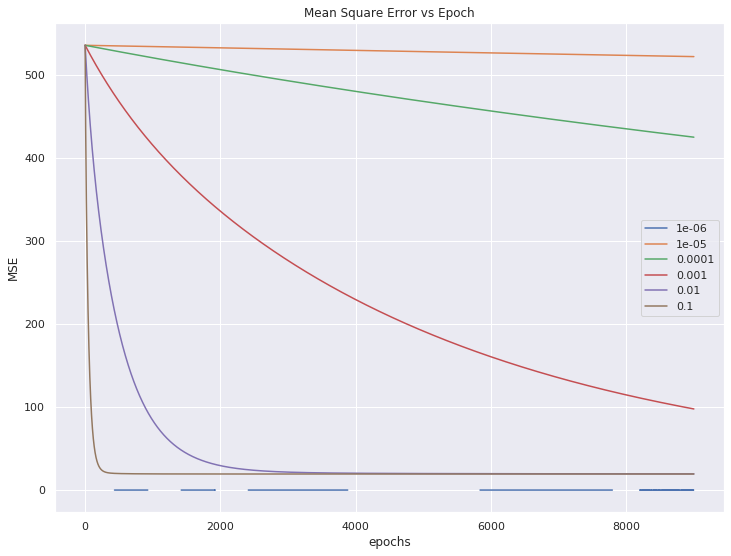

In [ ]:
learningrt_ar = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
iteraq4 = 9000
mseq41 = np.empty([1,iteraq4])
for i in range(6):
  w_graddesc1, mseq4 = gradient_descent(X_train_std_1, y_train, lamda=0, learningrt=learningrt_ar[i], itera=iteraq4)
  mseq4 = np.asarray(mseq4)
  mseq41 = np.vstack((mseq41,mseq4))

np.delete(mseq41, 0, 0)
#print(mseq41)
iteraq41 = np.arange(0,iteraq4)
for i in range(0,6):
 plt.plot(iteraq41, mseq41[i], label = learningrt_ar[i])
 plt.legend()
 plt.title('Mean Square Error vs Epoch')
 plt.xlabel('epochs')
 plt.ylabel('MSE')

#print(type(y_train))

### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]

**ANSWER** - Using the optimum learning rate derived from question 4 graphs as 0.01

In [ ]:
#fuunction to create batches

def batch(X_trainq5,y_trainq5,batch_size):
  batch_X = []
  batch_y = []
  q=-1
  for j in range(int(len(X_trainq5)/batch_size)):
    tempx = []
    tempy = []
    for k in range(batch_size):
      q=q+1
      tempx.append(X_trainq5[q])
      tempy.append(y_trainq5[q])
    batch_X.append(tempx)
    batch_y.append(tempy)

  if int(len(X_trainq5)%batch_size) != 0:
    for l in range(1):
      tempx = []
      tempy = []
      for m in range(int(len(X_trainq5)%batch_size)):
        q=q+1
        tempx.append(X_trainq5[q])
        tempy.append(y_trainq5[q])
      batch_X.append(tempx)
      batch_y.append(tempy)

  return batch_X,batch_y

In [ ]:
# function for gradient descent

def batch_grad_desc (X,y,batch_size,learningrt,itera=300,lamda = 0):
  
  np.random.seed(0)
  w_randq5 = np.random.randn(14, 1) 
  timehist = []
  mse_graddescq5 = []
  mse_gradepoch = []
  batchtime = []
        
  for i in range (itera):
    #randomizing data
    dataq5 = np.hstack((X,y))
    rand_traindataq5 = np.random.permutation(dataq5)
    X_trainq5 = np.delete(rand_traindataq5,14,1) #1 means delete along column axis
    y_trainq5 = rand_traindataq5[:,14]
    batch_X, batch_y = batch(X_trainq5,y_trainq5,batch_size)
    #gradient descent
    for n in range(len(batch_X)):
      start = time.time()
      ypredgradq5 = np.dot(np.asarray(batch_X[n]),w_randq5)
      w_randq5 = w_randq5 - learningrt*(1/len(batch_y[n]))*(np.dot(np.asarray(batch_X[n]).T, (ypredgradq5-np.asarray(batch_y[n]).reshape(-1,1)))+(lamda*w_randq5))
      ypredq5 = np.dot(X_trainq5,w_randq5)
      mse_graddescq5.append(mean_squared_error(ypredq5, y_trainq5))
      stop = time.time()
      timedif = stop - start
      batchtime.append(timedif)

    ypredq5epoch = np.dot(X_trainq5,w_randq5)
    mse_gradepoch.append(mean_squared_error(ypredq5epoch, y_trainq5))
  return mse_graddescq5, mse_gradepoch, batchtime

Using the optimum learning rate derived from question 4 graphs as 0.01

In [ ]:
total_mseq5 = []
total_mseq5epoch = []
total_time = []

for mb in [1,16,128,256,404]:
  mseq5, mseepochq5, btime = batch_grad_desc(X_train_std_1,y_train,mb,0.01,itera=400)
  total_mseq5.append(mseq5)
  total_mseq5epoch.append(mseepochq5)
  total_time.append(btime)


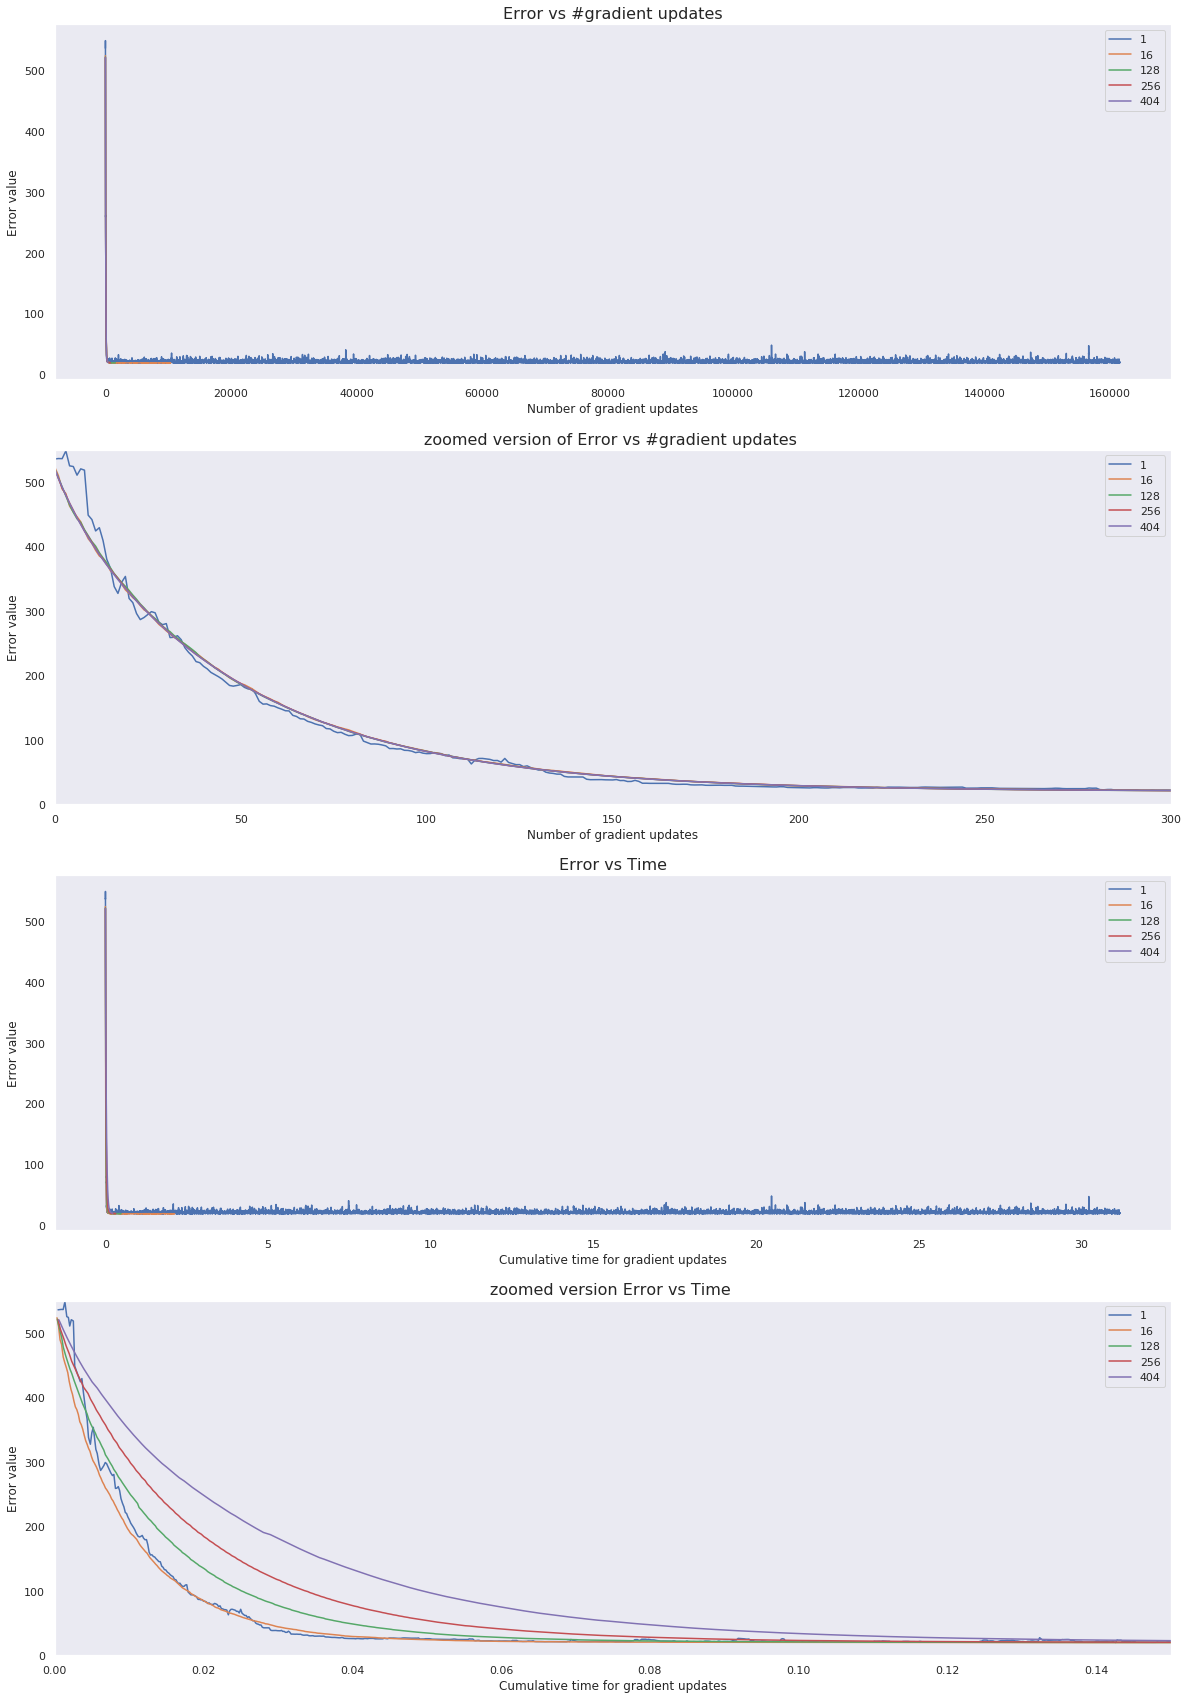

<Figure size 864x648 with 0 Axes>

In [ ]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1, figsize=(20,30))
key = ['1','16','128','256','404']
#Plotting error vs gradient updates
for i in range(len(total_mseq5)):
  ax1.plot(total_mseq5[i], label=key[i])
ax1.legend()
ax1.set_title('Error vs #gradient updates',fontsize=16)
ax1.set_xlabel('Number of gradient updates')
ax1.set_ylabel('Error value')
ax1.grid()

for i in range(len(total_mseq5)):
  ax2.plot(total_mseq5[i], label=key[i])
ax2.legend()
ax2.set_xlim(0,300)
ax2.set_ylim(0,550)
ax2.set_title('zoomed version of Error vs #gradient updates ',fontsize=16)
ax2.set_xlabel('Number of gradient updates')
ax2.set_ylabel('Error value')
ax2.grid()

#ERROR - TIME 
for i in range(len(total_time)):
  ax3.plot(np.cumsum(np.array(total_time[i])),total_mseq5[i],label=key[i])
ax3.legend()
ax3.set_title('Error vs Time',fontsize=16)
ax3.set_xlabel('Cumulative time for gradient updates')
ax3.set_ylabel('Error value')
ax3.grid()

for i in range(len(total_time)):
  ax4.plot(np.cumsum(np.array(total_time[i])),total_mseq5[i],label=key[i])
ax4.legend()
ax4.set_title('zoomed version Error vs Time ',fontsize=16)
ax4.set_xlabel('Cumulative time for gradient updates')
ax4.set_ylabel('Error value')
ax4.set_xlim(0,0.15)
ax4.set_ylim(0,550)
ax4.grid()



plt.show()
plt.tight_layout()



answer 5 part 2

- for B = 16, we get the fastest convergence in terms of wall clock time.
- for B = 256 and 404, we get the least noise in terms of gradient updates

To Conclude - B = 16 gives decent smoothness in gradient updates and is the fastest converging batch size in terms of wall clock. Hence B=16 can be considered the best value

### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]


2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1]

ANSWER Q6 PART 2 - 

The fastest convergence with minimal noise is observed for eeta = 0.01 and B = 16 (for 200 iterations) as evident in the graph plotted below. 



![alt text](https://drive.google.com/uc?id=0B6YksgEu_VxDTmY2eGJ1dUVkMWJyLUw3dVg1VkVqNTJMRDE0)

![alt text](https://drive.google.com/uc?id=10eFO6MxJz2bi1K7GQOoWzVVYuem3Djbu)

![alt text](https://drive.google.com/uc?id=1oL19UuxrVSbMpnVQSpk0NKN6aO6Spyhe)


It is observed in the graphs plotted in the previous and this question that the mean squred error training converges to a solution faster than that of absolute erorr. However using absolute error is more robust to outliers (hence the delayed convergence). Moreover, considering the MSE and MAE gradient graphs shown, the gradient of absolute error function is same throughout, even for small loss values. Hence the minima is not converged easily.

Hence, it is easier and computationally less expensive to train the model with mean squared error instead of mean absolute error.

In [ ]:
#using absolute error for loss
def batch_grad_desc_abs (X,y,batch_size,learningrt,itera=300,lamda = 0):
  
  np.random.seed(0)
  w_randq5 = np.random.randn(14, 1) 
  timehist = []
  mse_graddescq5 = []
  mse_gradepoch = []
  batchtime = []
    
    #-------------------------------------------------------

  for i in range (itera):
    #randomizing data
    dataq5 = np.hstack((X,y))
    rand_traindataq5 = np.random.permutation(dataq5)
    X_trainq5 = np.delete(rand_traindataq5,14,1) #1 means delete along column axis
    y_trainq5 = rand_traindataq5[:,14]
    batch_X, batch_y = batch(X_trainq5,y_trainq5,batch_size)
    #gradient descent
    for n in range(len(batch_X)):
      start = time.time()
      ypredgradq5 = np.dot(np.asarray(batch_X[n]),w_randq5)

      difference = ypredgradq5 - np.asarray(batch_y[n]).reshape(-1,1)
      ones_arr = [1 if difference[i]>0 else -1 if difference[i]<0 else 0 for i in range(len(difference))]
      grad = np.dot(np.asarray(batch_X[n]).T,np.array(ones_arr).reshape(-1,1))/(2*len(batch_X[n]))+2*lamda*np.sum(w_randq5)

      #w_randq5 = w_randq5 - learningrt*(1/len(batch_y[n]))*(np.dot(np.asarray(batch_X[n]).T, (ypredgradq5-np.asarray(batch_y[n]).reshape(-1,1)))+(lamda*w_randq5))
      w_randq5 = w_randq5 - learningrt*(1/len(batch_y[n]))*grad

      ypredq5 = np.dot(X_trainq5,w_randq5)
      mse_graddescq5.append(mean_squared_error(ypredq5, y_trainq5))
      stop = time.time()
      timedif = stop - start
      batchtime.append(timedif)

    ypredq5epoch = np.dot(X_trainq5,w_randq5)
    mse_gradepoch.append(mean_squared_error(ypredq5epoch, y_trainq5))
  return mse_graddescq5, mse_gradepoch, batchtime

In [ ]:
total_mseq6 = []
total_mseq6epoch = []
total_timeq6 = []

for mb in [1,16,128,256,404]:
  mseq6, mseepochq6, btimeq6 = batch_grad_desc_abs(X_train_std_1,y_train,mb,0.01,itera=400)
  total_mseq6.append(mseq6)
  total_mseq6epoch.append(mseepochq6)
  total_timeq6.append(btimeq6)

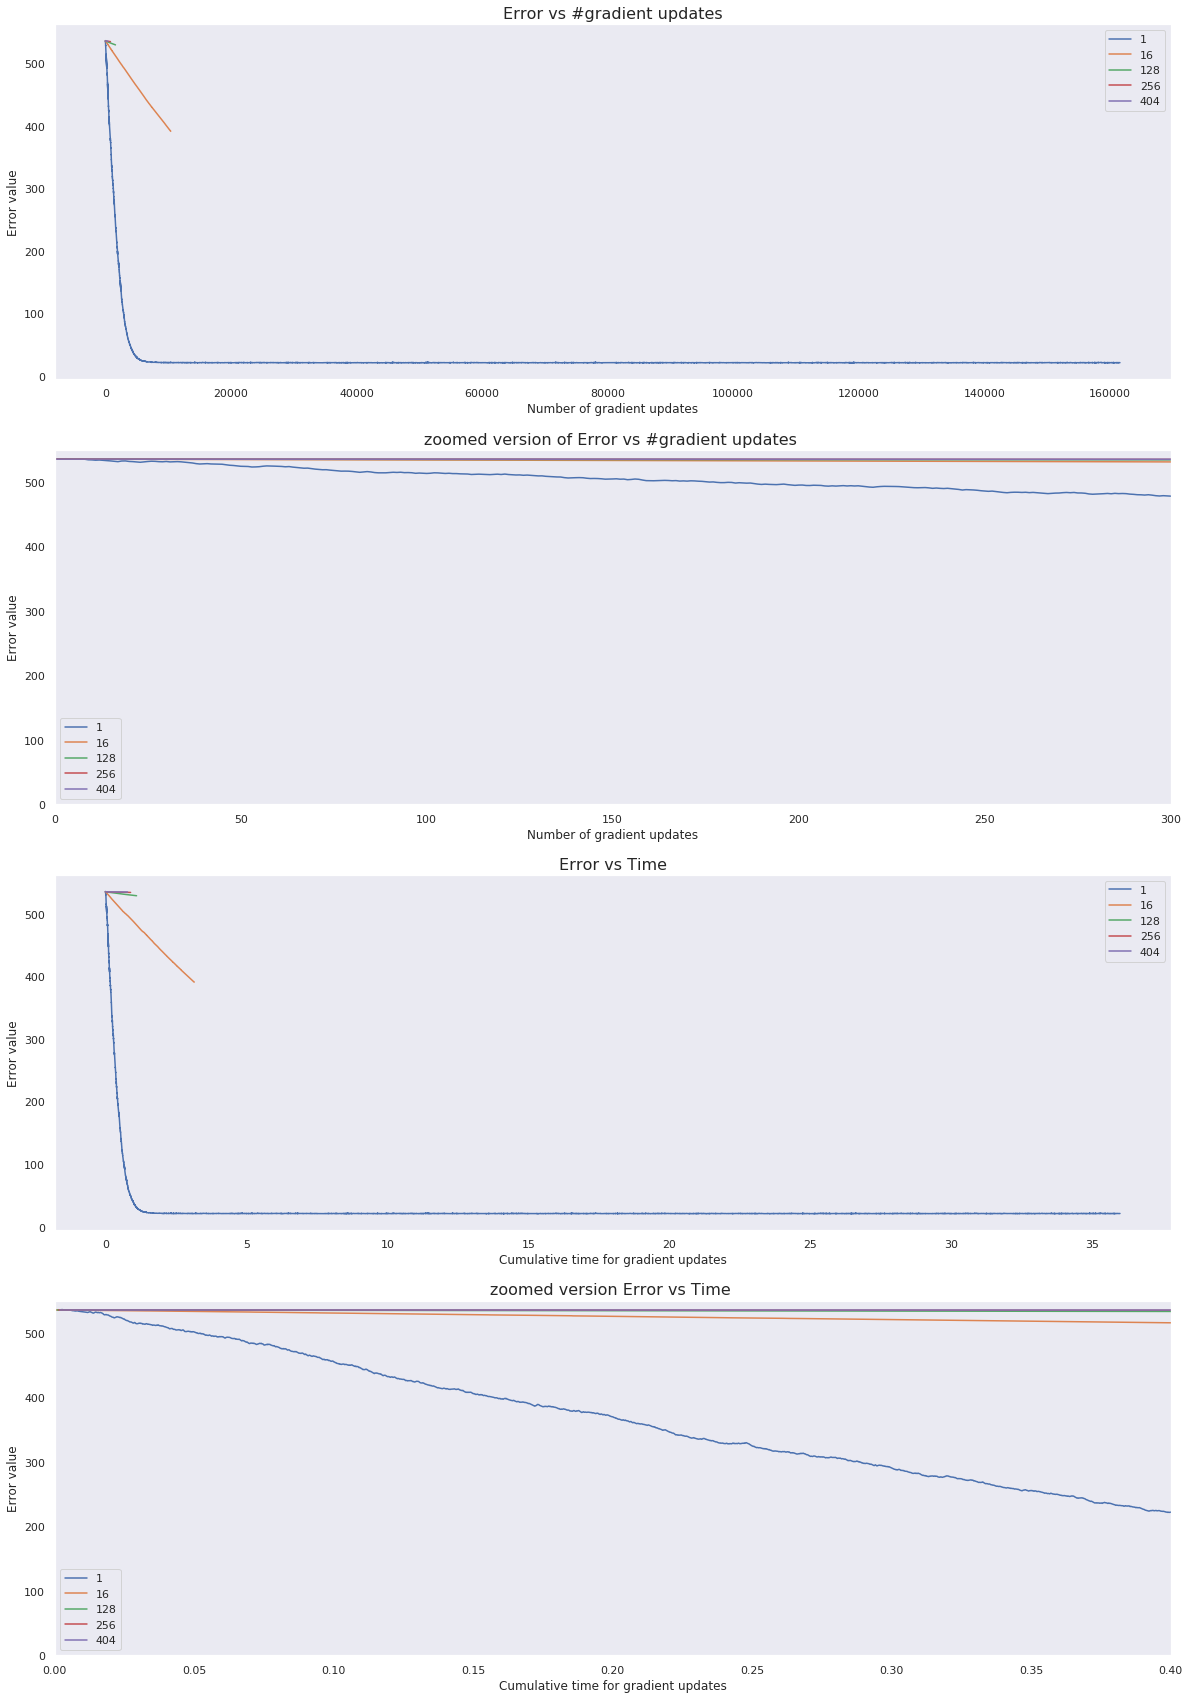

<Figure size 864x648 with 0 Axes>

In [ ]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1, figsize=(20,30))
key = ['1','16','128','256','404']
#Plotting error vs gradient updates
for i in range(len(total_mseq6)):
  ax1.plot(total_mseq6[i], label=key[i])
ax1.legend()
ax1.set_title('Error vs #gradient updates',fontsize=16)
ax1.set_xlabel('Number of gradient updates')
ax1.set_ylabel('Error value')
ax1.grid()

for i in range(len(total_mseq6)):
  ax2.plot(total_mseq6[i], label=key[i])
ax2.legend()
ax2.set_xlim(0,300)
ax2.set_ylim(0,550)
ax2.set_title('zoomed version of Error vs #gradient updates ',fontsize=16)
ax2.set_xlabel('Number of gradient updates')
ax2.set_ylabel('Error value')
ax2.grid()

#ERROR - TIME 
for i in range(len(total_timeq6)):
  ax3.plot(np.cumsum(np.array(total_timeq6[i])),total_mseq6[i],label=key[i])
ax3.legend()
ax3.set_title('Error vs Time',fontsize=16)
ax3.set_xlabel('Cumulative time for gradient updates')
ax3.set_ylabel('Error value')
ax3.grid()

for i in range(len(total_timeq6)):
  ax4.plot(np.cumsum(np.array(total_timeq6[i])),total_mseq6[i],label=key[i])
ax4.legend()
ax4.set_title('zoomed version Error vs Time ',fontsize=16)
ax4.set_xlabel('Cumulative time for gradient updates')
ax4.set_ylabel('Error value')
ax4.set_xlim(0,0.4)
ax4.set_ylim(0,550)
ax4.grid()



plt.show()
plt.tight_layout()



In [ ]:
# # optimizing eeta and B for mse error grad descent

total_mseq6 = []
total_mseq6epoch = []
total_timeq6 = []
learningrt_arq6 = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])

for lr in learningrt_arq6:
  for mb in [1,16,128,256,404]:
    mseq6, mseepochq6, btimeq6 = batch_grad_desc(X_train_std_1,y_train,mb,lr,itera=200)
    total_mseq6.append(mseq6)
    total_mseq6epoch.append(mseepochq6)
    total_timeq6.append(btimeq6)



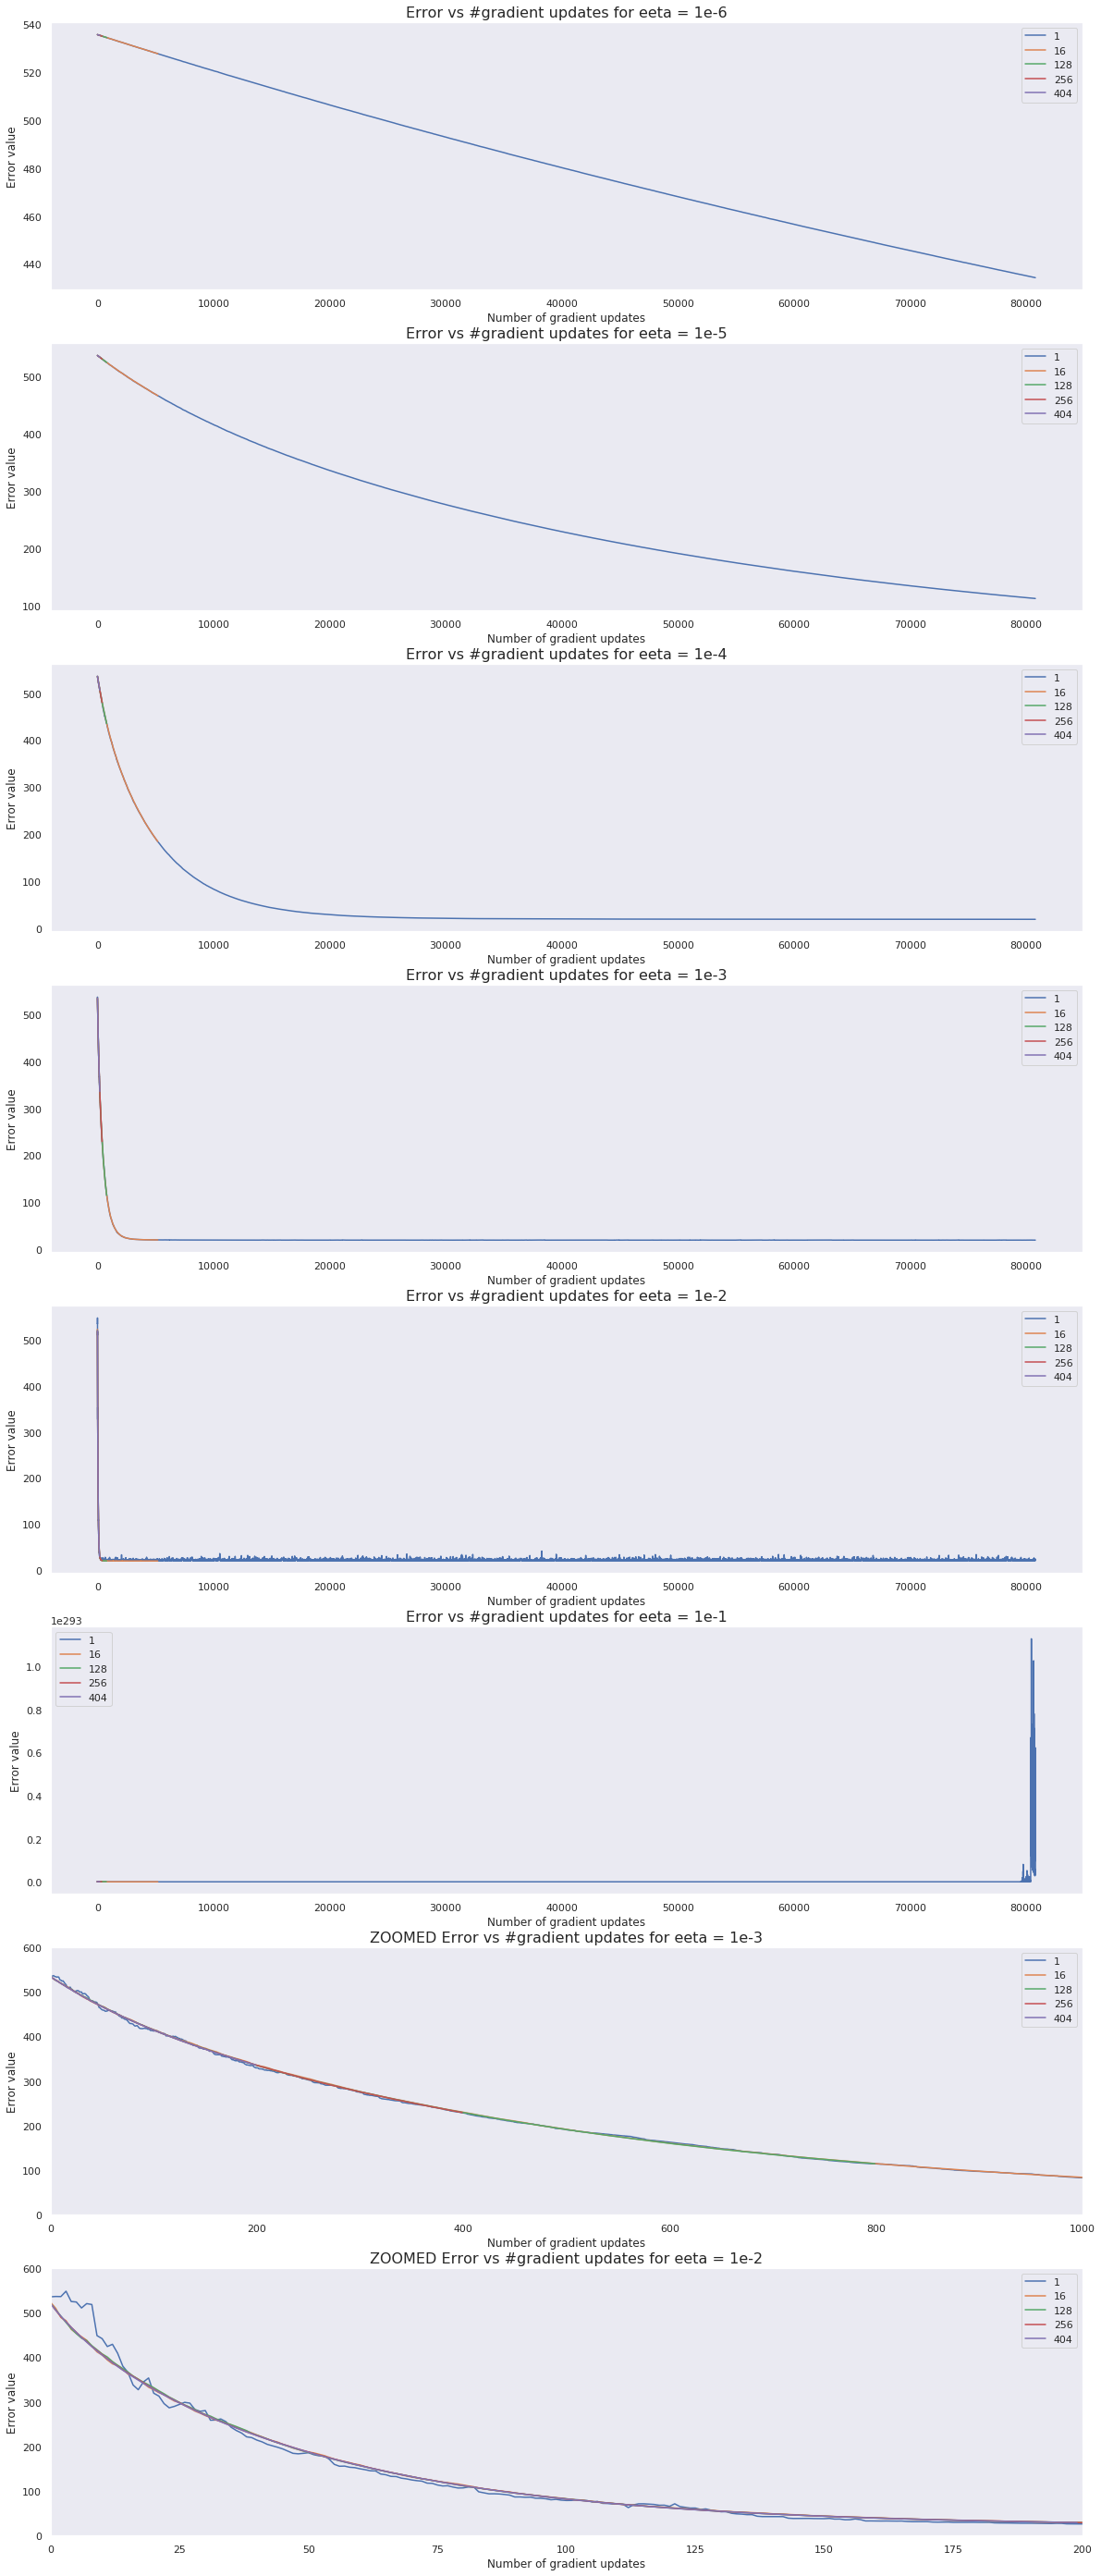

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)=plt.subplots(8,1, figsize=(20,50))
key = ['1','16','128','256','404','1','16','128','256','404','1','16','128','256','404','1','16','128','256','404','1','16','128','256','404','1','16','128','256','404']
#Plotting error vs gradient updates
for i in range(0,5):
  ax1.plot(total_mseq6[i], label=key[i])
ax1.legend()
ax1.set_title('Error vs #gradient updates for eeta = 1e-6',fontsize=16)
ax1.set_xlabel('Number of gradient updates')
ax1.set_ylabel('Error value')
ax1.grid()

for i in range(5,10):
  ax2.plot(total_mseq6[i], label=key[i])
ax2.legend()
ax2.set_title('Error vs #gradient updates for eeta = 1e-5',fontsize=16)
ax2.set_xlabel('Number of gradient updates')
ax2.set_ylabel('Error value')
ax2.grid()

for i in range(10,15):
  ax3.plot(total_mseq6[i], label=key[i])
ax3.legend()
ax3.set_title('Error vs #gradient updates for eeta = 1e-4',fontsize=16)
ax3.set_xlabel('Number of gradient updates')
ax3.set_ylabel('Error value')
ax3.grid()

for i in range(15,20):
  ax4.plot(total_mseq6[i], label=key[i])
ax4.legend()
ax4.set_title('Error vs #gradient updates for eeta = 1e-3',fontsize=16)
ax4.set_xlabel('Number of gradient updates')
ax4.set_ylabel('Error value')
ax4.grid()

for i in range(20,25):
  ax5.plot(total_mseq6[i], label=key[i])
ax5.legend()
ax5.set_title('Error vs #gradient updates for eeta = 1e-2',fontsize=16)
ax5.set_xlabel('Number of gradient updates')
ax5.set_ylabel('Error value')
ax5.grid()

for i in range(25,30):
  ax6.plot(total_mseq6[i], label=key[i])
ax6.legend()
ax6.set_title('Error vs #gradient updates for eeta = 1e-1',fontsize=16)
ax6.set_xlabel('Number of gradient updates')
ax6.set_ylabel('Error value')
ax6.grid()

for i in range(15,20):
  ax7.plot(total_mseq6[i], label=key[i])
ax7.legend()
ax7.set_title('ZOOMED Error vs #gradient updates for eeta = 1e-3',fontsize=16)
ax7.set_xlabel('Number of gradient updates')
ax7.set_ylabel('Error value')
ax7.set_xlim(0,1000)
ax7.set_ylim(0,600)
ax7.grid()

for i in range(20,25):
  ax8.plot(total_mseq6[i], label=key[i])
ax8.legend()
ax8.set_title('ZOOMED Error vs #gradient updates for eeta = 1e-2',fontsize=16)
ax8.set_xlabel('Number of gradient updates')
ax8.set_ylabel('Error value')
ax8.set_xlim(0,200)
ax8.set_ylim(0,600)
ax8.grid()



### Question 7 (Optional)

1. Does the model perform better if polynomial features are added (Use sklearn.preprocessing.PolynomialFeatures to test it out).


2. Does the optimal value of λ (regularization constant) change with this new set of features added.

## References

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2